In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os

os.chdir('/Users/naman/Desktop/UChicago/Autumn 2022 Quarter 1/Data Science for Consulting/')

df = pd.read_excel('Final Assignment - Week 9.xlsx')

# 1. Perform descriptive statistics on all variables to help understand the data, the distributions and basic info you have to work with on this challenge. (Mean, Standard Deviation, Median, Min, Max and Histogram)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33713 entries, 0 to 33712
Data columns (total 69 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                33713 non-null  int64  
 1   logtarg           8311 non-null   float64
 2   r                 33713 non-null  int64  
 3   f                 33713 non-null  int64  
 4   m                 33713 non-null  float64
 5   tof               33713 non-null  int64  
 6   Ffiction1         33713 non-null  int64  
 7   Fclassics3        33713 non-null  int64  
 8   Fcartoons5        33713 non-null  int64  
 9   Flegends6         33713 non-null  int64  
 10  Fphilosophy7      33713 non-null  int64  
 11  Freligion8        33713 non-null  int64  
 12  Fpsychology9      33713 non-null  int64  
 13  Flinguistics10    33713 non-null  int64  
 14  Fart12            33713 non-null  int64  
 15  Fmusic14          33713 non-null  int64  
 16  Ffacsimile17      33713 non-null  int64 

In [4]:
df = df.drop(['Unnamed: 66','Unnamed: 67','Dear Greg,'],axis=1,inplace=False)
summary_stats = df.describe().loc[['mean','std','50%','min','max']].transpose()
summary_stats

,mean,std,50%,min,max
id,8.234209e+06,4.426015e+06,7.967691e+06,914.0,1.625264e+07
logtarg,1.300501e-01,6.599617e-01,0.000000e+00,0.0,6.082878e+00
r,5.084273e+02,5.424400e+02,2.930000e+02,0.0,2.460000e+03
f,5.820603e+00,7.008049e+00,3.000000e+00,0.0,1.180000e+02
m,2.519243e+02,3.929930e+03,1.026299e+02,0.0,5.328920e+05
tof,1.296088e+03,8.189763e+02,1.311000e+03,0.0,2.462000e+03
Ffiction1,5.908997e-01,1.762201e+00,0.000000e+00,0.0,1.090000e+02
Fclassics3,2.281019e-01,8.655097e-01,0.000000e+00,0.0,2.900000e+01
Fcartoons5,3.564797e-01,1.105653e+00,0.000000e+00,0.0,4.900000e+01
Flegends6,1.047667e-01,5.277639e-01,0.000000e+00,0.0,2.200000e+01


In [5]:
#Missing % Values
round((df.isnull().sum()/len(df))*100,2)

id                   0.00
logtarg             75.35
r                    0.00
f                    0.00
m                    0.00
tof                  0.00
Ffiction1            0.00
Fclassics3           0.00
Fcartoons5           0.00
Flegends6            0.00
Fphilosophy7         0.00
Freligion8           0.00
Fpsychology9         0.00
Flinguistics10       0.00
Fart12               0.00
Fmusic14             0.00
Ffacsimile17         0.00
Fhistory19           0.00
Fconthist20          0.00
Feconomy21           0.00
Fpolitics22          0.00
Fscience23           0.00
Fcompsci26           0.00
Frailroads27         0.00
Fmaps30              0.00
Ftravelguides31      0.00
Fhealth35            0.00
Fcooking36           0.00
Flearning37          0.00
FGamesRiddles38      0.00
Fsports39            0.00
Fhobby40             0.00
Fnature41            0.00
Fencyclopaedia44     0.00
Fvideos50            0.00
Fnonbooks99          0.00
Mfiction1            0.00
Mclassics3           0.00
Mcartoons5  

# 2. Create a new data set with more descriptive labels and the data needed for analysis

In [6]:
df = df.drop(['logtarg'],axis = 1)
initial_cols = ['id','recency','frequency','monetary','time_in_days']
count = df.columns[df.columns.str.startswith('F')].str.replace('F','count_').str.replace('[0-9]+','').values
amount = df.columns[df.columns.str.startswith('M')].str.replace('M','amount_').str.replace('[0-9]+','').values

cols = np.concatenate([initial_cols,count,amount])
df.columns = cols

array([[<AxesSubplot:title={'center':'count_fiction'}>,
        <AxesSubplot:title={'center':'count_classics'}>,
        <AxesSubplot:title={'center':'count_cartoons'}>,
        <AxesSubplot:title={'center':'count_legends'}>,
        <AxesSubplot:title={'center':'count_philosophy'}>],
       [<AxesSubplot:title={'center':'count_religion'}>,
        <AxesSubplot:title={'center':'count_psychology'}>,
        <AxesSubplot:title={'center':'count_linguistics'}>,
        <AxesSubplot:title={'center':'count_art'}>,
        <AxesSubplot:title={'center':'count_music'}>],
       [<AxesSubplot:title={'center':'count_facsimile'}>,
        <AxesSubplot:title={'center':'count_history'}>,
        <AxesSubplot:title={'center':'count_conthist'}>,
        <AxesSubplot:title={'center':'count_economy'}>,
        <AxesSubplot:title={'center':'count_politics'}>],
       [<AxesSubplot:title={'center':'count_science'}>,
        <AxesSubplot:title={'center':'count_compsci'}>,
        <AxesSubplot:title={'cente

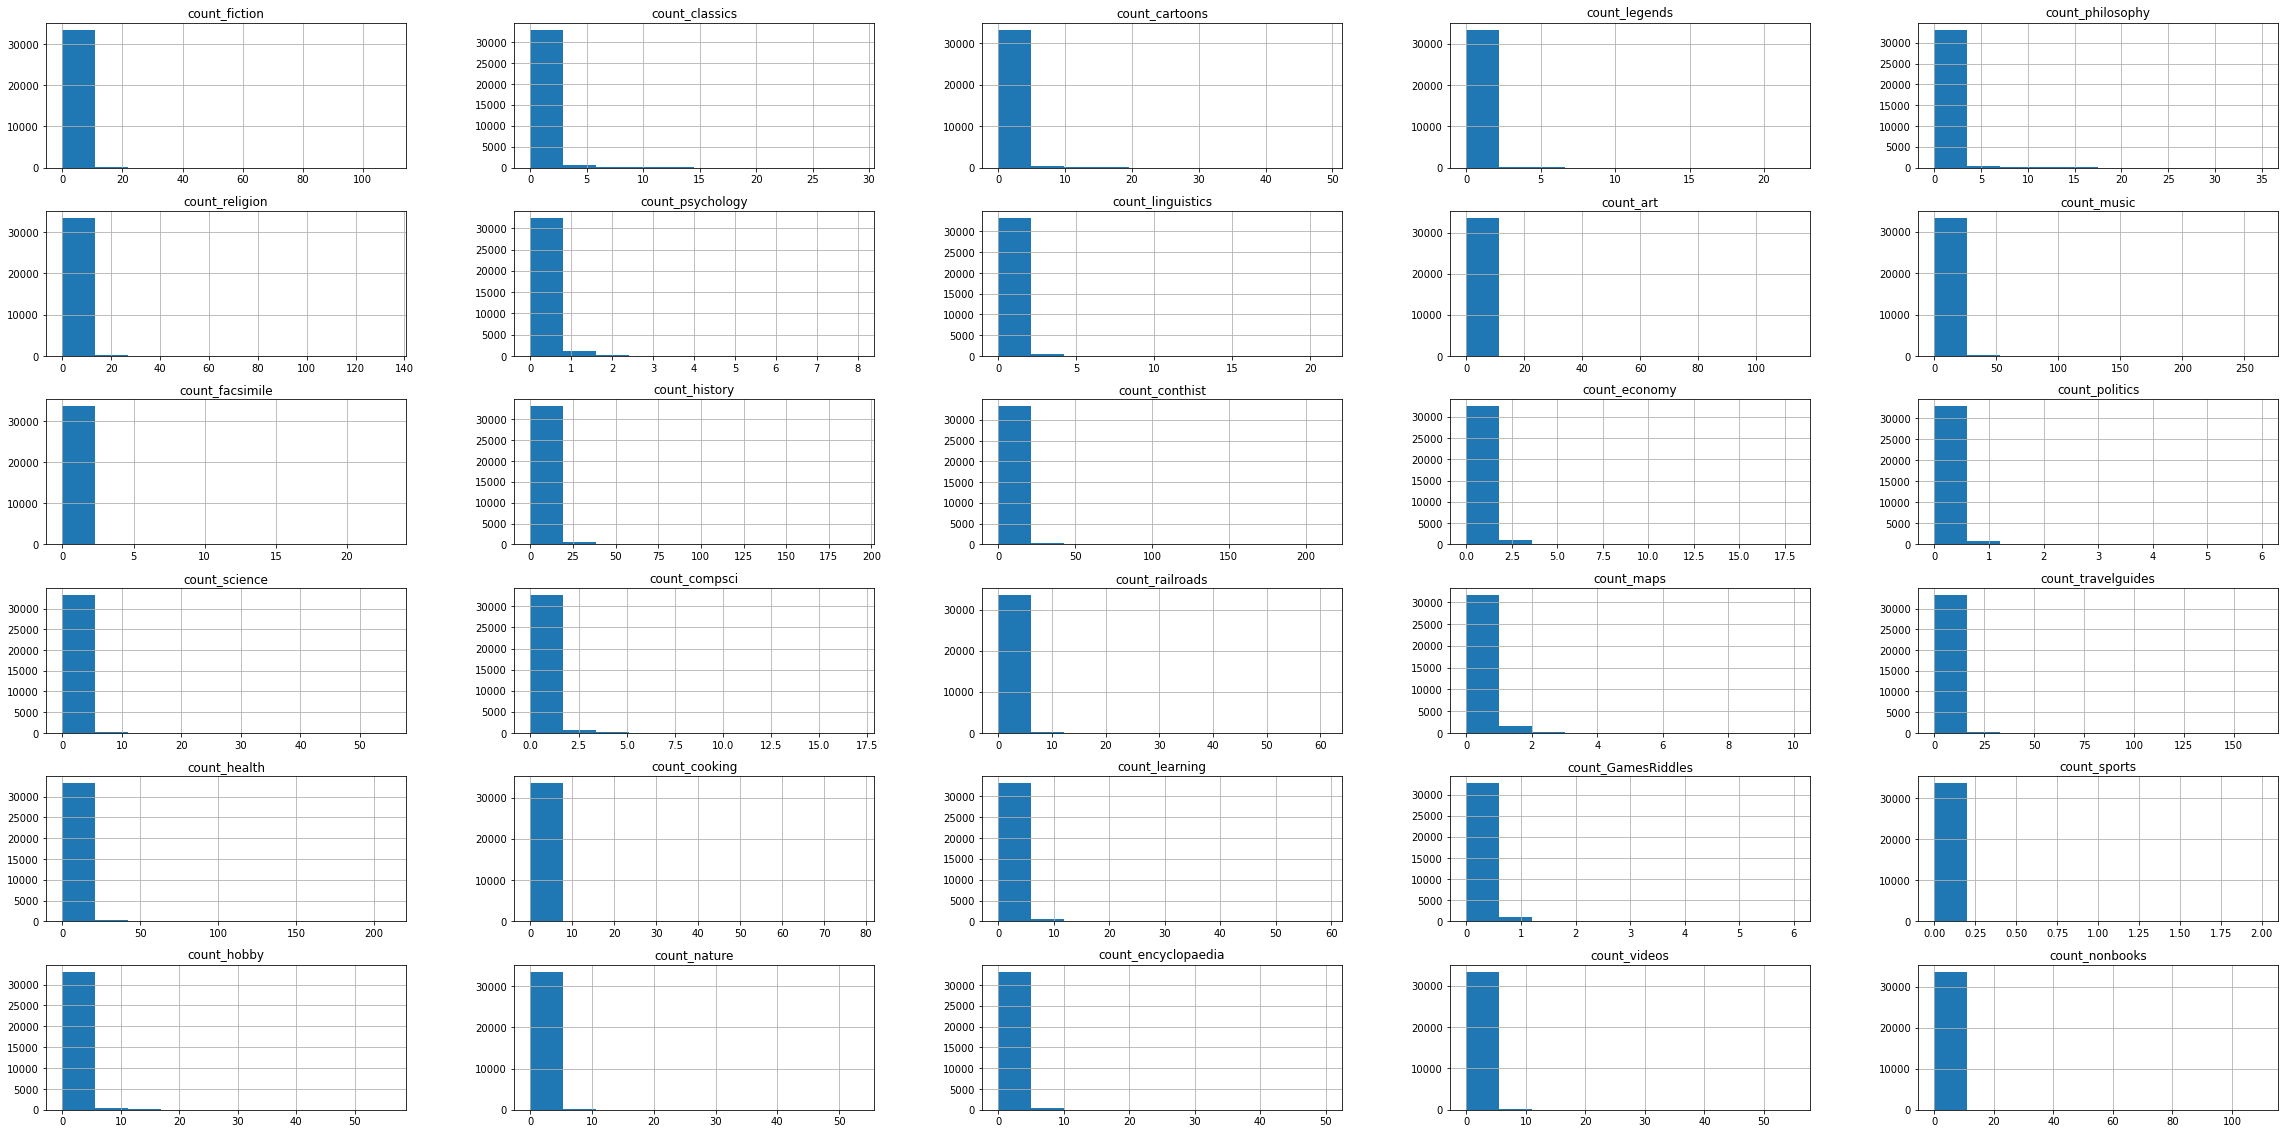

In [7]:
df[count].hist(figsize = (40,20))

array([[<AxesSubplot:title={'center':'amount_fiction'}>,
        <AxesSubplot:title={'center':'amount_classics'}>,
        <AxesSubplot:title={'center':'amount_cartoons'}>,
        <AxesSubplot:title={'center':'amount_legends'}>,
        <AxesSubplot:title={'center':'amount_philosophy'}>],
       [<AxesSubplot:title={'center':'amount_religion'}>,
        <AxesSubplot:title={'center':'amount_psychology'}>,
        <AxesSubplot:title={'center':'amount_linguistics'}>,
        <AxesSubplot:title={'center':'amount_art'}>,
        <AxesSubplot:title={'center':'amount_music'}>],
       [<AxesSubplot:title={'center':'amount_facsimile'}>,
        <AxesSubplot:title={'center':'amount_history'}>,
        <AxesSubplot:title={'center':'amount_conthist'}>,
        <AxesSubplot:title={'center':'amount_economy'}>,
        <AxesSubplot:title={'center':'amount_politics'}>],
       [<AxesSubplot:title={'center':'amount_science'}>,
        <AxesSubplot:title={'center':'amount_compsci'}>,
        <AxesSubp

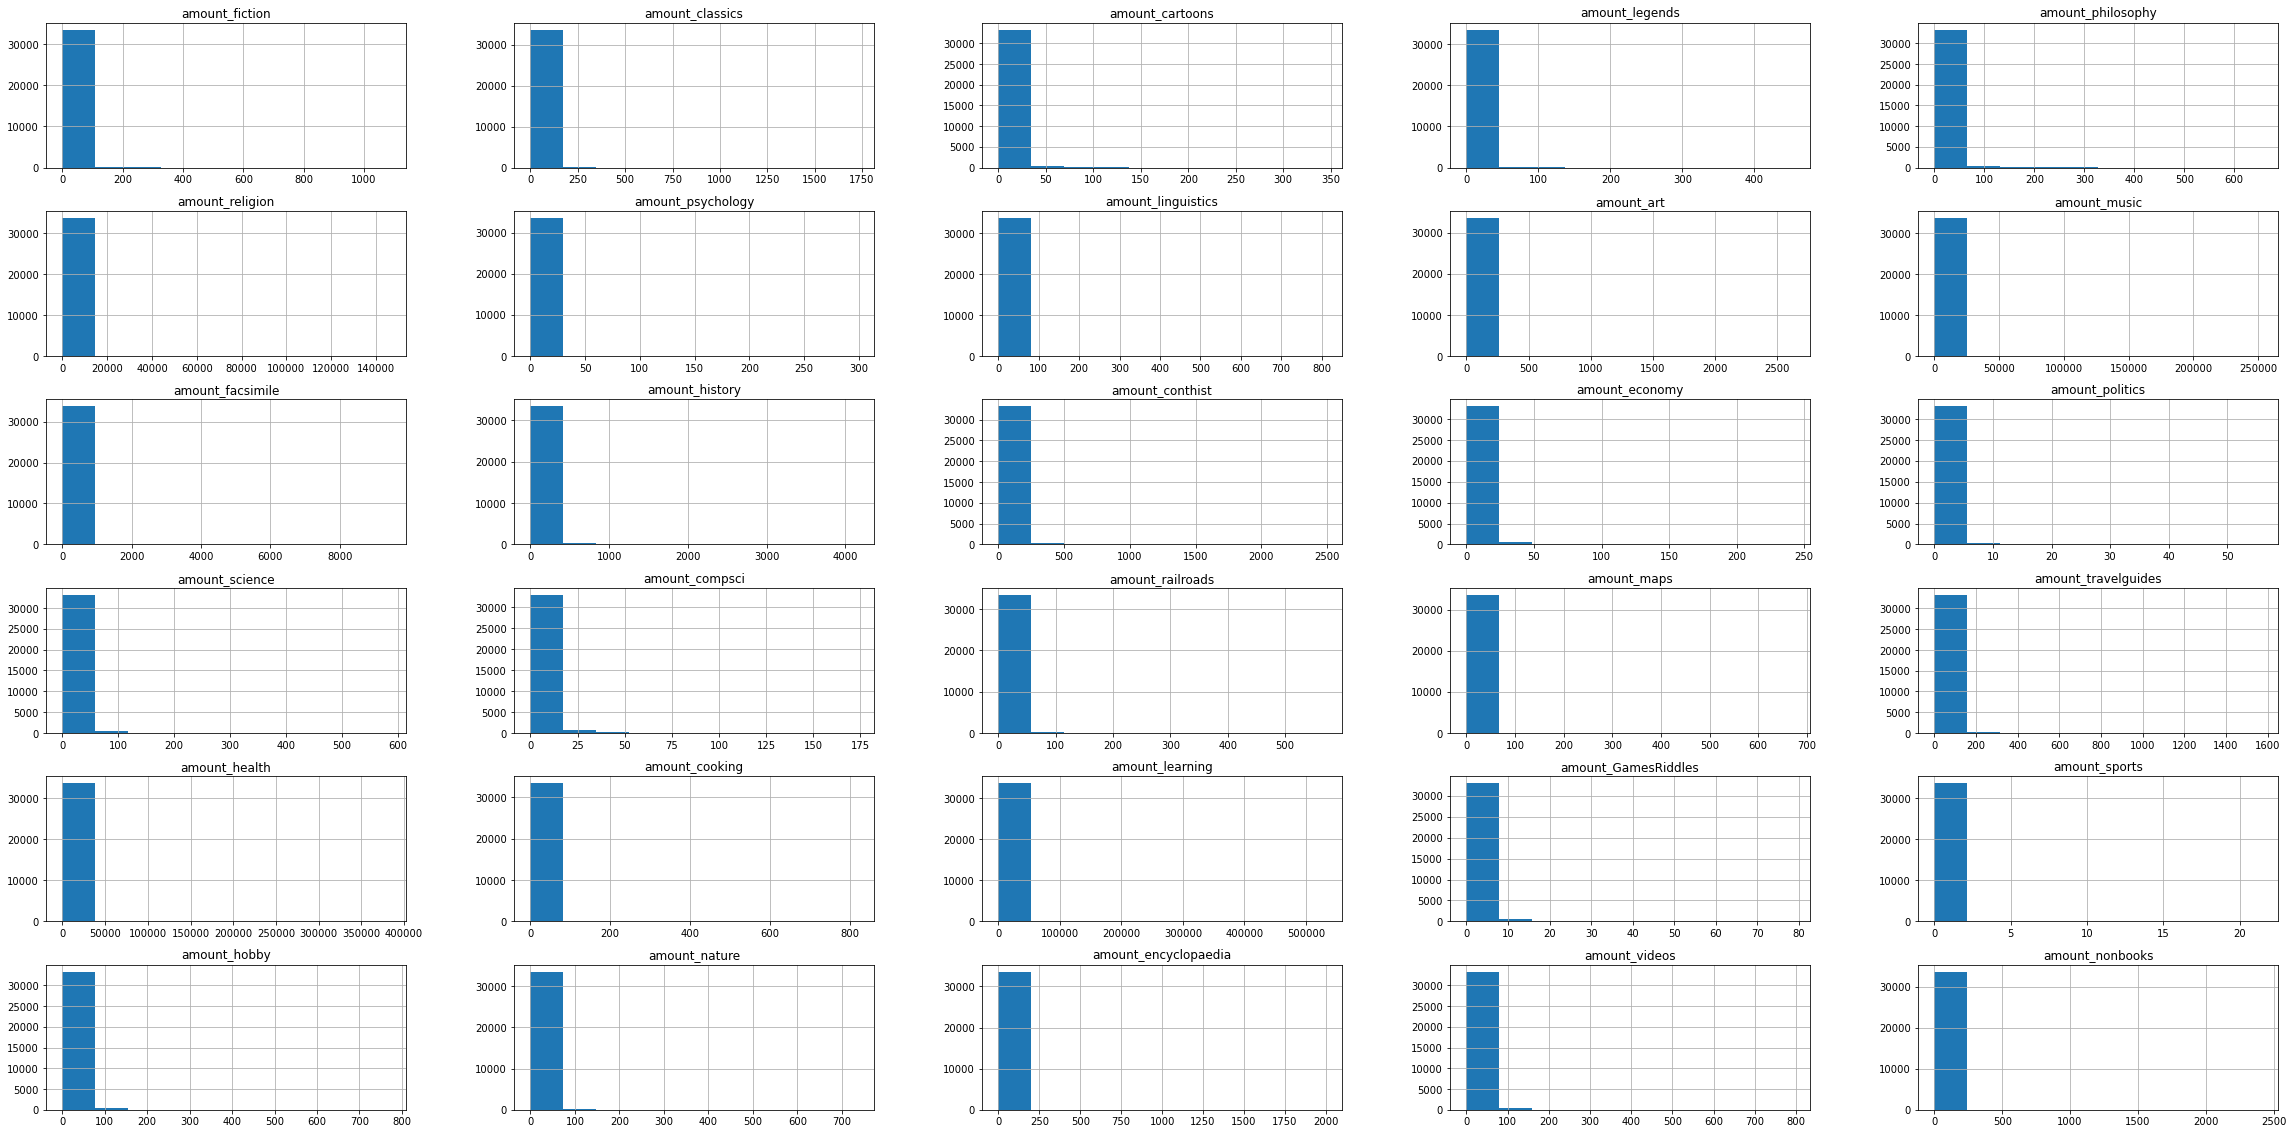

In [8]:
df[amount].hist(figsize = (40,20))

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'recency'}>],
       [<AxesSubplot:title={'center':'frequency'}>,
        <AxesSubplot:title={'center':'monetary'}>],
       [<AxesSubplot:title={'center':'time_in_days'}>, <AxesSubplot:>]],
      dtype=object)

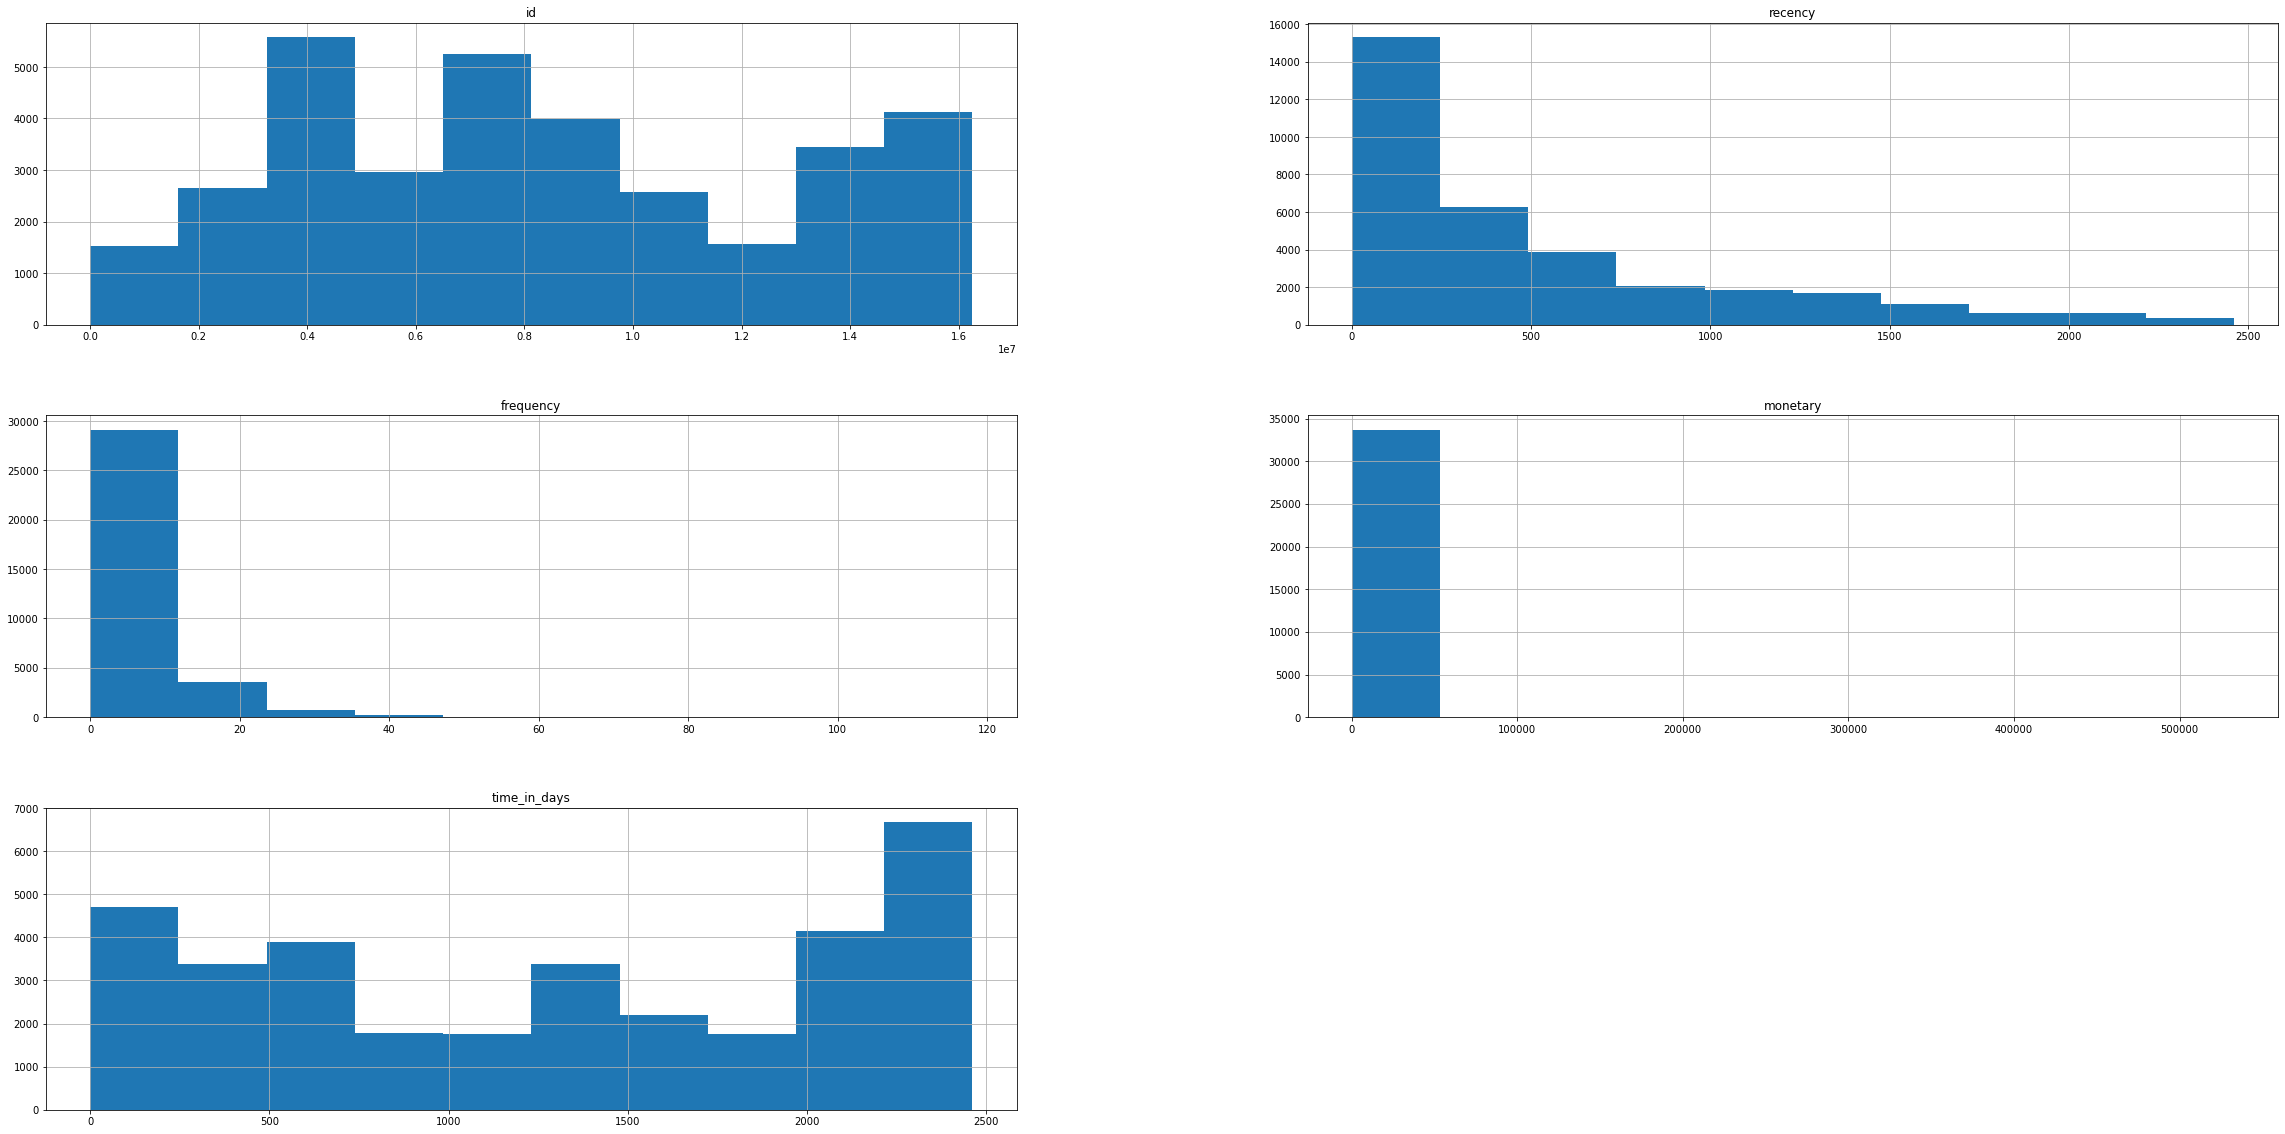

In [9]:
df[initial_cols].hist(figsize = (40,20))

In [10]:
cor = df.corr()
round(cor * 100,2)

,id,recency,frequency,monetary,time_in_days,count_fiction,count_classics,count_cartoons,count_legends,count_philosophy,count_religion,count_psychology,count_linguistics,count_art,count_music,count_facsimile,count_history,count_conthist,count_economy,count_politics,count_science,count_compsci,count_railroads,count_maps,count_travelguides,count_health,count_cooking,count_learning,count_GamesRiddles,count_sports,count_hobby,count_nature,count_encyclopaedia,count_videos,count_nonbooks,amount_fiction,amount_classics,amount_cartoons,amount_legends,amount_philosophy,amount_religion,amount_psychology,amount_linguistics,amount_art,amount_music,amount_facsimile,amount_history,amount_conthist,amount_economy,amount_politics,amount_science,amount_compsci,amount_railroads,amount_maps,amount_travelguides,amount_health,amount_cooking,amount_learning,amount_GamesRiddles,amount_sports,amount_hobby,amount_nature,amount_encyclopaedia,amount_videos,amount_nonbooks
id,100.00,-31.07,-33.78,-2.49,-75.22,-16.65,-15.91,-9.66,-9.55,-13.50,-16.15,-7.34,-15.21,-17.33,-6.97,-8.56,-22.70,-13.75,-11.77,-6.46,-14.44,-12.14,-10.00,-11.68,-19.47,-12.82,-11.98,-8.53,-4.15,-2.56,-19.73,-10.97,-15.05,1.45,-3.38,-15.12,-7.48,-11.76,-7.01,-11.13,-0.75,-3.94,-11.89,-14.76,0.31,-2.69,-20.66,-13.82,-11.79,-6.33,-12.88,-12.08,-10.45,-5.78,-18.44,-0.63,-11.05,-0.36,-4.24,-2.50,-17.80,-9.16,-5.84,2.13,-4.67
recency,-31.07,100.00,-24.17,-2.16,39.65,-10.37,-4.78,-12.24,-5.74,-6.15,-9.23,-4.86,-4.31,-7.14,-16.70,-0.34,-12.98,-14.39,-4.75,-4.50,-7.59,-5.07,-5.93,-1.53,-8.42,-13.08,-3.80,-13.10,-5.77,-0.62,-8.20,-10.67,-8.65,-14.05,-1.39,-7.65,-1.29,-8.70,-4.29,-2.45,-0.90,-1.98,-1.68,-5.26,-1.06,-0.18,-10.69,-13.05,-2.66,-3.36,-6.56,-3.40,-5.37,2.14,-6.90,-0.56,0.75,-0.48,-4.96,-0.68,-5.23,-8.03,-2.86,-14.14,-0.84
frequency,-33.78,-24.17,100.00,8.03,47.84,50.18,39.98,41.70,30.17,36.83,46.37,23.65,35.16,48.78,44.84,16.21,63.55,48.42,29.67,20.84,39.80,29.75,25.36,25.46,49.81,43.86,33.78,35.92,16.59,5.67,50.49,38.06,43.17,22.50,22.39,43.48,17.04,39.69,22.15,25.65,4.04,12.53,26.08,41.10,1.84,5.96,55.02,45.94,26.35,18.32,33.78,27.13,25.19,11.95,47.09,1.86,26.71,0.59,15.03,5.51,42.39,30.08,16.79,20.80,13.76
monetary,-2.49,-2.16,8.03,100.00,3.94,5.74,3.94,5.35,2.96,3.84,5.60,4.02,4.43,5.63,5.25,3.40,6.94,4.73,3.61,1.98,4.67,4.24,2.30,5.00,6.47,6.18,4.08,11.56,1.72,0.57,6.01,4.69,6.96,2.29,1.41,5.19,2.55,5.73,2.39,3.07,20.68,2.59,3.46,5.41,35.27,3.11,6.93,4.73,3.13,1.79,4.93,3.98,2.41,1.96,6.77,53.19,3.67,73.85,1.74,0.55,5.38,3.99,3.86,2.29,2.17
time_in_days,-75.22,39.65,47.84,3.94,100.00,22.74,20.81,14.84,13.67,18.51,21.65,10.72,22.07,23.49,9.80,11.83,30.86,19.52,17.81,9.73,19.58,16.87,13.49,17.10,25.98,20.22,17.22,14.75,6.44,3.44,27.27,15.83,22.18,1.18,12.77,20.76,9.93,17.60,10.22,15.28,1.08,5.64,17.63,20.42,-0.12,3.88,28.05,19.62,17.60,9.33,17.06,16.65,14.22,9.06,25.04,1.16,16.26,0.76,6.41,3.20,24.70,12.55,8.87,0.17,6.91
count_fiction,-16.65,-10.37,50.18,5.74,22.74,100.00,50.78,51.70,39.66,31.99,35.09,23.66,34.91,43.57,34.19,10.76,43.73,25.39,20.41,17.17,29.70,21.04,14.74,19.49,37.70,33.91,31.30,30.85,19.36,3.35,44.59,41.38,40.41,16.83,13.67,84.37,21.48,49.36,27.50,19.40,2.23,10.90,25.94,35.88,1.35,3.04,34.66,21.99,17.19,12.81,24.61,19.16,14.49,9.83,34.80,0.81,23.89,0.58,15.94,3.15,35.00,32.37,16.95,15.18,9.00
count_classics,-15.91,-4.78,39.98,3.94,20.81,50.78,100.00,27.83,28.72,35.24,27.65,17.69,24.17,38.03,24.16,10.06,37.74,21.23,11.66,10.98,22.32,11.19,7.06,13.83,27.24,17.39,17.22,17.36,11.07,3.26,26.84,23.65,25.26,7.49,10.33,46.97,47.24,27.94,20.78,27.23,1.09,11.80,19.28,30.90,1.02,2.10,31.48,19.24,9.95,9.17,19.06,10.64,7.25,6.96,26.03,0.22,13.92,-0.06,9.61,3.39,22.14,19.74,11.29,7.24,9.08
count_cartoons,-9.66,-12.24,41.70,5.35,14.84,51.70,27.83,100.00,25.55,22.43,32.15,19.89,32.63,25.38,28.27,6.79,31.12,21.86,19.74,16.20,24.68,19.55,11.87,14.18,28.90,29.97,25.02,30.52,17.49,3.25,34.37,28.85,40.53,13.91,8.84,39.88,9.61,92.80,15.52,12.20,1.13,9.52,21.37,19.55,1.02,1.69,24.58,18

In [11]:
df_rmf = df[['id','recency','frequency','monetary']]
df_rmf.head()

,id,recency,frequency,monetary
0,914,194,7,318.894775
1,957,3,14,368.052246
2,1406,1489,15,423.298340
3,1414,155,4,71.217041
4,1546,194,6,442.638184


In [12]:
#remove customer with 0 values in Recency, Frequency, and Monetary
df_rmf1 = df_rmf[(df_rmf[['recency','frequency','monetary']]!=0).any(axis=1)]
df_rmf1.head()

,id,recency,frequency,monetary
0,914,194,7,318.894775
1,957,3,14,368.052246
2,1406,1489,15,423.298340
3,1414,155,4,71.217041
4,1546,194,6,442.638184


In [13]:
df_rmf1.describe()

,id,recency,frequency,monetary
count,3.335500e+04,33355.000000,33355.000000,33355.000000
mean,8.207836e+06,513.884215,5.883076,254.628235
std,4.420609e+06,542.766117,7.019427,3950.877048
min,9.140000e+02,1.000000,1.000000,0.000000
25%,4.382374e+06,124.000000,2.000000,41.447250
50%,7.958528e+06,299.000000,3.000000,104.379211
75%,1.198238e+07,725.000000,7.000000,249.839966
max,1.625264e+07,2460.000000,118.000000,532892.000000


In [14]:
cor = df_rmf1.corr()
round(cor * 100,2)

,id,recency,frequency,monetary
id,100.00,-30.86,-33.63,-2.47
recency,-30.86,100.00,-25.21,-2.23
frequency,-33.63,-25.21,100.00,8.00
monetary,-2.47,-2.23,8.00,100.00


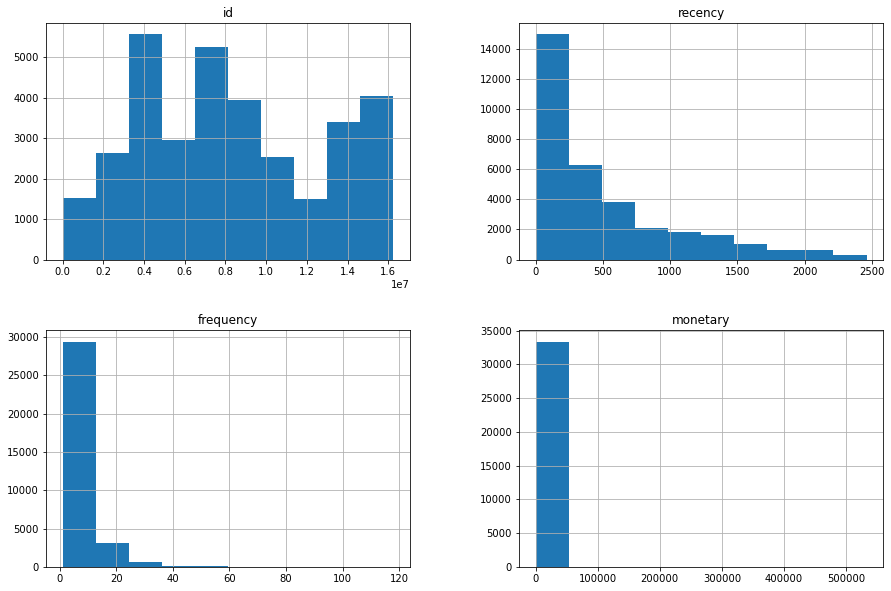

In [15]:
fig = plt.figure(figsize=(15,10));
ax = fig.gca()
df_rmf1.hist(ax=ax) 
pass

# 3.	Document the problem you will address using the SMART framework – use hypothetical data and goals for the improvement your Recommendation Engine will deliver

SMART GOAL: 

Specific: Boost US book sales on Ecommerce websites by 20%. 

Measurable: Enhance marketing effectiveness to expand customer base by 15% and boost order volume by 30% from current clients. 

Actionable: Develop a model to assist in segmenting the clients who use the e-commerce website so that they can be targeted appropriately to boost the overall number of books sold.

Relevant: The current method is promoting sales, but a new approach might be more effective.

Timebound: Drive to improve sales by the end of 90 days.

# 4.	Select from a pool of titles and roles within the company to create a core team (Maximum 6-8 members) to perform the analysis and develop the pitch to your CMO. 

(Pool: VP Finance, Data Engineer, SVP Data Scientist, Financial Analyst, Customer Satisfaction Manager, Website Analyst, Webmaster, VP Marketing, Performance Marketing SEM/SEO Analyst, Customer Retention Manager, Marketing Manager, Customer Research Analyst, Data Visualization Specialist, Sr. Data Scientist, Marketing Analytics Manager, IT Manager for Ecommerce Data Storage, Marketing Messaging/Creative Designer, Ecommerce Financial Manager)

The following roles would be a part of the core team:

* Customer Satisfaction Manager: To bring some domain knowledge about the ecommerce website; knows whether or not the customer is satisfied.

* Performance Marketing SEM/SEO Analyst: To help generate innovative methods to create more traffic on the ecommerce website.

* Sr. Data Scientist: To develop the new model for application.

* Data Engineer: To help create the data pipeline for further analysis and model development.

* Data Visualization Specialist: To create interpretable and interactive visualisations to analyze and present the data. 

* SVP Data Scientist: To lead the data science team, manage client needs with respect to time, and implement solutions to build the website.

# 5.	Describe the team strengths and discipline focus areas that justify your need for each person and why this talent will be necessary for your success. This justification is intended to both motivate the team members and gain support from their managers to join your team.

The team strengths and focuses are mentioned above. Moreover, the team will pursue a common outcome and have a common goal they want to reach while they value one another’s contributions and skill sets. 

# 6. Choose either a “supervised” or an “unsupervised” approach to segment/cluster current customers using the data provided.

Customer Segments with RFM Model

The simplest way to create customers segments from RFM Model is to use Quartiles. We assign a score from 1 to 4 to Recency, Frequency and Monetary. Four is the best/highest value, and one is the lowest/worst value. A final RFM score is calculated simply by combining individual RFM score numbers.

Reference: https://www.kaggle.com/code/sarahm/customer-segmentation-using-rfm-analysis/notebook

In [16]:
quantiles = df_rmf1.quantile([0.25,0.5,0.75])
quantiles

,id,recency,frequency,monetary
0.25,4382374.5,124.0,2.0,41.447250
0.50,7958528.0,299.0,3.0,104.379211
0.75,11982377.0,725.0,7.0,249.839966


In [17]:
quantiles.to_dict()

{'id': {0.25: 4382374.5, 0.5: 7958528.0, 0.75: 11982377.0},
 'recency': {0.25: 124.0, 0.5: 299.0, 0.75: 725.0},
 'frequency': {0.25: 2.0, 0.5: 3.0, 0.75: 7.0},
 'monetary': {0.25: 41.447250366, 0.5: 104.37921143, 0.75: 249.83996581999997}}

We will create two segmentation classes since, high recency is bad, while high frequency and monetary value is good.

In [18]:
# Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [19]:
#create rfm segmentation table
rfm_segmentation = df_rmf1
rfm_segmentation['R_Quartile'] = rfm_segmentation['recency'].apply(RScore, args=('recency',quantiles,))
rfm_segmentation['F_Quartile'] = rfm_segmentation['frequency'].apply(FMScore, args=('frequency',quantiles,))
rfm_segmentation['M_Quartile'] = rfm_segmentation['monetary'].apply(FMScore, args=('monetary',quantiles,))

In [20]:
rfm_segmentation.head()

,id,recency,frequency,monetary,R_Quartile,F_Quartile,M_Quartile
0,914,194,7,318.894775,3,3,4
1,957,3,14,368.052246,4,4,4
2,1406,1489,15,423.298340,1,4,4
3,1414,155,4,71.217041,3,3,2
4,1546,194,6,442.638184,3,3,4


In [21]:
rfm_segmentation['RFMScore'] = rfm_segmentation.R_Quartile.map(str) \
                            + rfm_segmentation.F_Quartile.map(str) \
                            + rfm_segmentation.M_Quartile.map(str)
rfm_segmentation.head()

,id,recency,frequency,monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
0,914,194,7,318.894775,3,3,4,334
1,957,3,14,368.052246,4,4,4,444
2,1406,1489,15,423.298340,1,4,4,144
3,1414,155,4,71.217041,3,3,2,332
4,1546,194,6,442.638184,3,3,4,334


In [22]:
#find the best customers
rfm_segmentation[rfm_segmentation['RFMScore']=='444'].sort_values('monetary', ascending=False).head()

,id,recency,frequency,monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
9044,5900190,69,11,532892.000000,4,4,4,444
13833,8192553,23,31,147684.875000,4,4,4,444
21167,13729756,16,118,18582.531250,4,4,4,444
7478,4980476,25,38,10073.937500,4,4,4,444
2538,2901870,34,110,9446.015625,4,4,4,444


In [23]:
#Calcuate the number of cusomters in each segment:
print("Best Customers: ",len(rfm_segmentation[rfm_segmentation['RFMScore']=='444']))
print('Loyal Customers: ',len(rfm_segmentation[rfm_segmentation['F_Quartile']==4]))
print("Big Spenders: ",len(rfm_segmentation[rfm_segmentation['M_Quartile']==4]))
print('Almost Lost: ', len(rfm_segmentation[rfm_segmentation['RFMScore']=='244']))
print('Lost Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='144']))
print('Lost Cheap Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='111']))

Best Customers:  2734
Loyal Customers:  8282
Big Spenders:  8339
Almost Lost:  1366
Lost Customers:  553
Lost Cheap Customers:  2194


Now we have different segements of customers and we can find approriate methods to target each segment.

Here are some examples:

* Best Customers: They will be the first group of people getting notified with new products and have early access to new products.

* Loyal Customers: Frequent customers might receive a most popular suggestion from the same category of book as their current purchase without a discount.

* Lost Cheap Customers: Infrequent customers might receive a discounted popular item to incentivize a purchase.

Create sample data (5-10 records) with synthetic data to show how a new transaction will be scored and assigned to a segment/cluster.

In [24]:
data = {'id':[1,2,3,4,5,6,7,8,9,10],
        'Recency':[20, 21, 19, 18, 12, 24, 48, 64, 56, 78],
        'Frequency':[128, 46, 100, 57, 69, 91, 21, 19, 47, 96],
        'Monetary':[2468, 135, 77, 128, 3102, 2577, 408, 124, 99, 55]}

df = pd.DataFrame(data)
df.head()

,id,Recency,Frequency,Monetary
0,1,20,128,2468
1,2,21,46,135
2,3,19,100,77
3,4,18,57,128
4,5,12,69,3102


In [25]:
quantiles_df = df.quantile([0.25,0.5,0.75])
quantiles_df.head()

,id,Recency,Frequency,Monetary
0.25,3.25,19.25,46.25,105.25
0.50,5.50,22.50,63.00,131.50
0.75,7.75,54.00,94.75,1953.00


In [26]:
rfm_segmentation_df = df
rfm_segmentation_df['R_Quartile'] = rfm_segmentation_df['Recency'].apply(RScore, args=('Recency',quantiles_df,))
rfm_segmentation_df['F_Quartile'] = rfm_segmentation_df['Frequency'].apply(FMScore, args=('Frequency',quantiles_df,))
rfm_segmentation_df['M_Quartile'] = rfm_segmentation_df['Monetary'].apply(FMScore, args=('Monetary',quantiles_df,))

In [27]:
rfm_segmentation_df['RFMScore'] = rfm_segmentation_df.R_Quartile.map(str) \
                            + rfm_segmentation_df.F_Quartile.map(str) \
                            + rfm_segmentation_df.M_Quartile.map(str)
rfm_segmentation_df

,id,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
0,1,20,128,2468,3,4,4,344
1,2,21,46,135,3,1,3,313
2,3,19,100,77,4,4,1,441
3,4,18,57,128,4,2,2,422
4,5,12,69,3102,4,3,4,434
5,6,24,91,2577,2,3,4,234
6,7,48,21,408,2,1,3,213
7,8,64,19,124,1,1,2,112
8,9,56,47,99,1,2,1,121
9,10,78,96,55,1,4,1,141


In [28]:
rfm_segmentation_df.sort_values('Monetary', ascending=False).head()

,id,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
4,5,12,69,3102,4,3,4,434
5,6,24,91,2577,2,3,4,234
0,1,20,128,2468,3,4,4,344
6,7,48,21,408,2,1,3,213
1,2,21,46,135,3,1,3,313


In [29]:
print("Best Customers: ",len(rfm_segmentation_df[rfm_segmentation_df['RFMScore']=='434']))
print('Loyal Customers: ',len(rfm_segmentation_df[rfm_segmentation_df['F_Quartile']==4]))
print("Big Spenders: ",len(rfm_segmentation_df[rfm_segmentation_df['M_Quartile']==4]))
print('Almost Lost: ', len(rfm_segmentation_df[rfm_segmentation_df['RFMScore']=='244']))
print('Lost Customers: ',len(rfm_segmentation_df[rfm_segmentation_df['RFMScore']=='121']))
print('Lost Cheap Customers: ',len(rfm_segmentation_df[rfm_segmentation_df['RFMScore']=='141']))

Best Customers:  1
Loyal Customers:  3
Big Spenders:  3
Almost Lost:  0
Lost Customers:  1
Lost Cheap Customers:  1


In [30]:
rfm_segmentation_df['Segmentation'] = 0

rfm_segmentation_df['Segmentation'][rfm_segmentation_df['F_Quartile']==4] = 'Loyal Customers'
rfm_segmentation_df['Segmentation'][rfm_segmentation_df['M_Quartile']==4] = 'Big Spenders'
rfm_segmentation_df['Segmentation'][rfm_segmentation_df['RFMScore']=='434'] = 'Best Customers'

rfm_segmentation_df['Segmentation'][rfm_segmentation_df['RFMScore']=='244'] = 'Almost Lost'
rfm_segmentation_df['Segmentation'][rfm_segmentation_df['RFMScore']=='121'] = 'Lost Customers'
rfm_segmentation_df['Segmentation'][rfm_segmentation_df['RFMScore']=='141'] = 'Lost Cheap Customers'

In [31]:
rfm_segmentation_df.head()

,id,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segmentation
0,1,20,128,2468,3,4,4,344,Big Spenders
1,2,21,46,135,3,1,3,313,0
2,3,19,100,77,4,4,1,441,Loyal Customers
3,4,18,57,128,4,2,2,422,0
4,5,12,69,3102,4,3,4,434,Best Customers
